In [ ]:
%pip install yellowbrick
import setuptools.dist
from yellowbrick.cluster import silhouette_visualizer 
import matplotlib
import matplotlib.font_manager
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

In [18]:
# load iris dataset as pandas dataframe (common ML dataset)
# loaded from scikit-learn
dataset = sklearn.datasets.load_iris(as_frame=True)

# 2D matrix
# .loc selects all rows, and selects those 2 columns
X = (dataset
     ['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
# used for supervised learning
y = dataset['target']

Text(0.5, 1.0, 'Elbow Method')

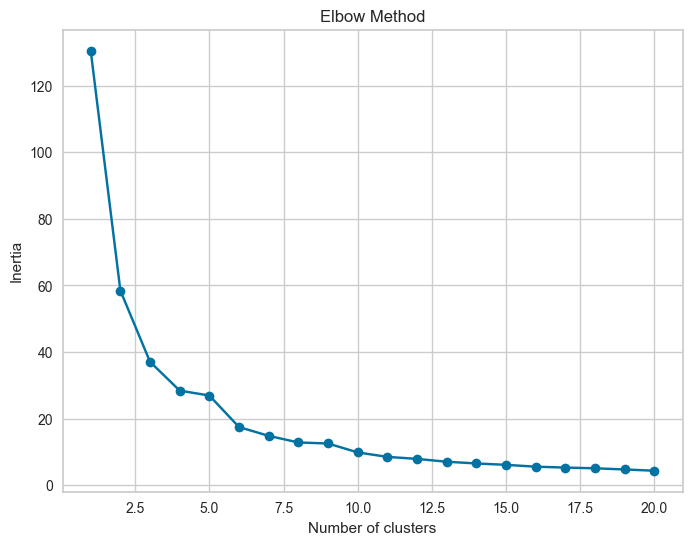

In [19]:
# Run elbow method to find optimal number of clusters

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')

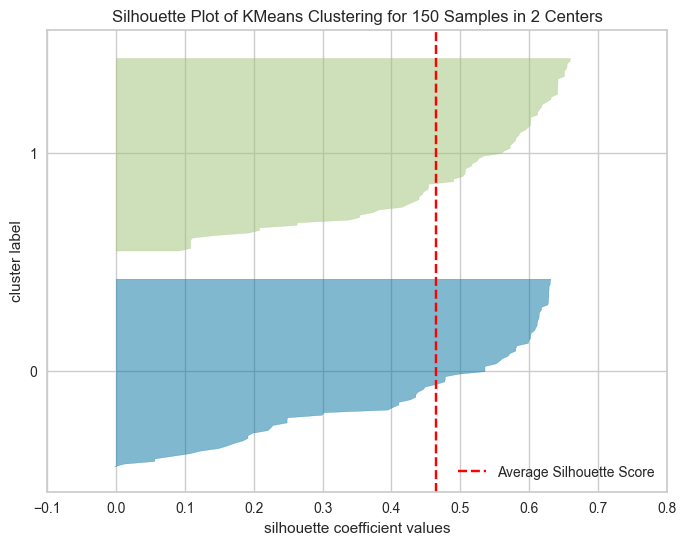

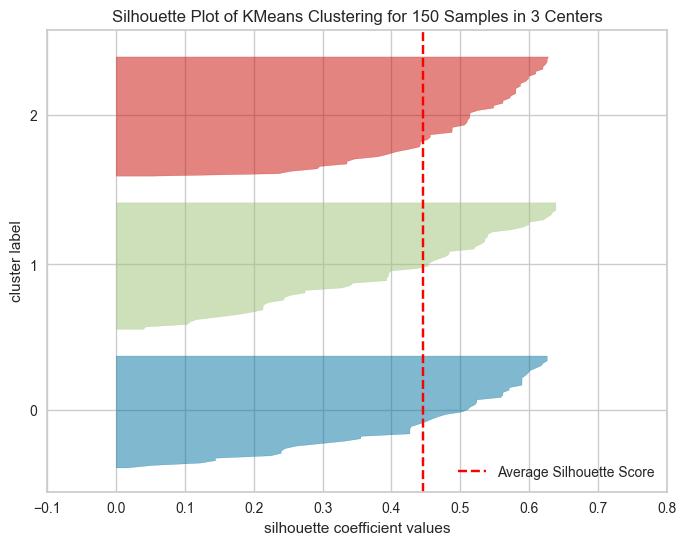

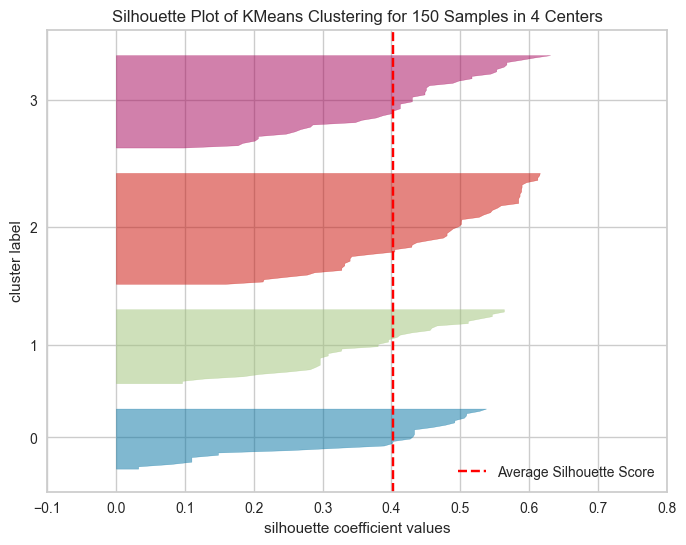

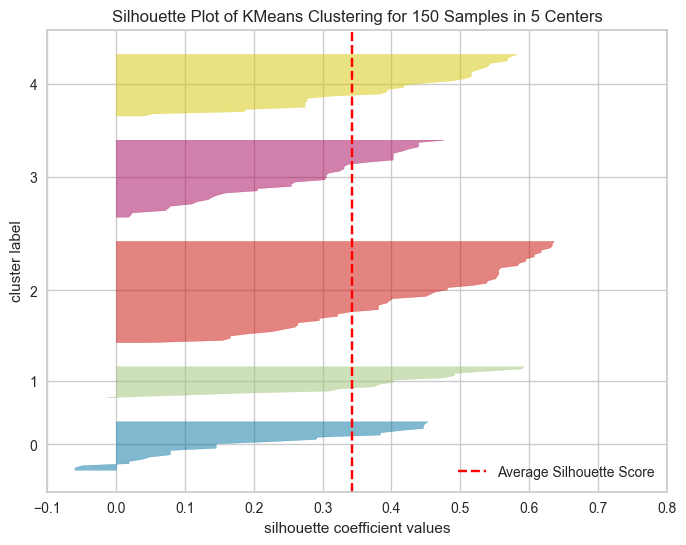

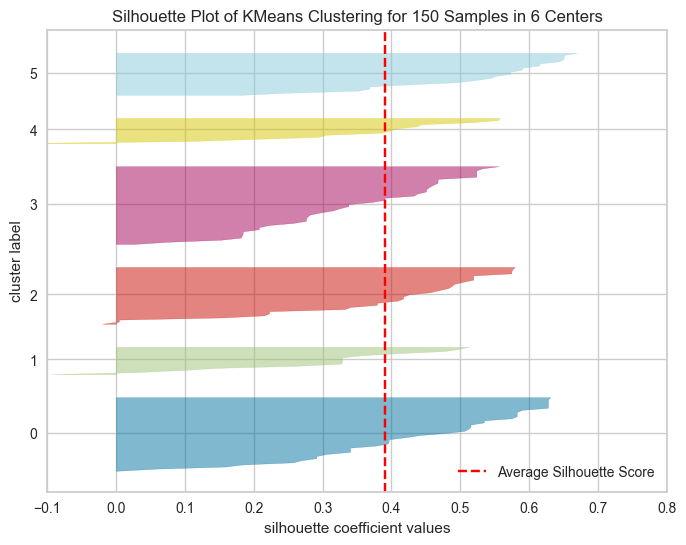

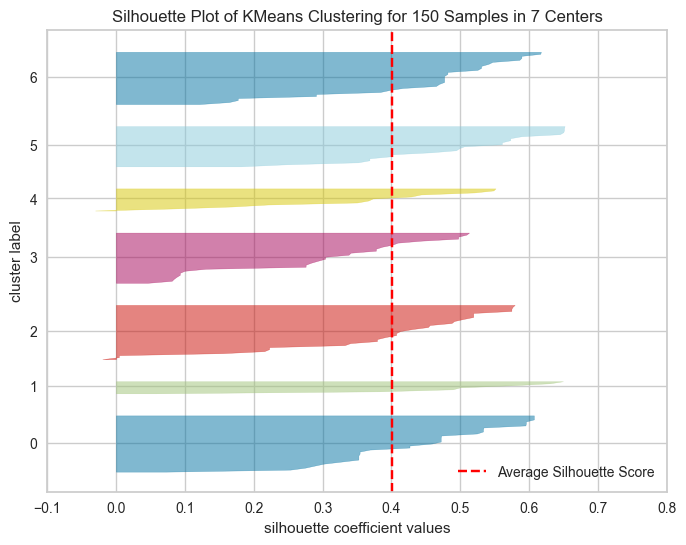

In [20]:
# Run silhouette method to find optimal number of clusters
from yellowbrick.cluster import silhouette_visualizer 

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto',
                max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    # setting show=False so we can set xlim to same value for all plots
    viz = silhouette_visualizer(km, X, colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])  